In [74]:
from sklearn.cluster import KMeans
from sklearn import datasets
import pandas as pd
from sklearn import metrics
from sklearn.decomposition import PCA
from seaborn import scatterplot
from seaborn import lineplot
from sklearn.manifold import TSNE
import numpy as np

## Data

In [3]:
iris = datasets.load_iris()

In [21]:
X = pd.DataFrame(iris.data)
y = iris.target

# Clustering

In [61]:
kmeans_model = KMeans(n_clusters=3, random_state=1).fit(X)
labels = kmeans_model.labels_

# Visualization

In [36]:
pca = PCA()
components = pd.DataFrame(pca.fit_transform(X))

In [52]:
tsne = TSNE()
tsne_results = pd.DataFrame(tsne.fit_transform(X))

## PCA

<AxesSubplot:xlabel='0', ylabel='1'>

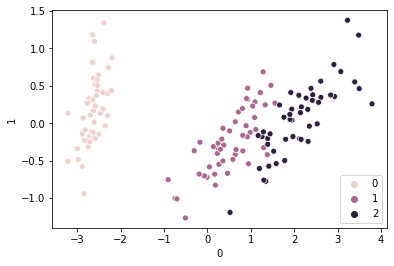

In [46]:
# True labels
scatterplot(components[0], components[1], hue=y)

<AxesSubplot:xlabel='0', ylabel='1'>

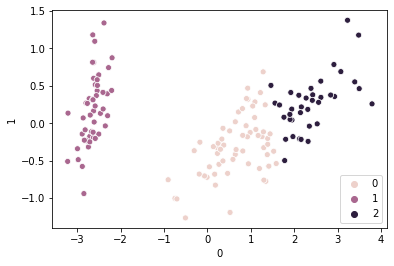

In [45]:
# Clusters
scatterplot(components[0], components[1], hue=labels)

## TSNE

<AxesSubplot:xlabel='0', ylabel='1'>

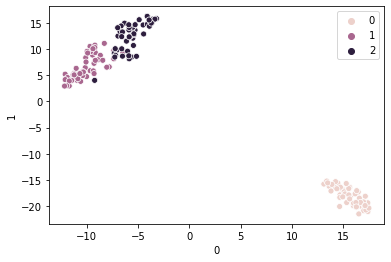

In [55]:
# True labels
scatterplot(tsne_results[0], tsne_results[1], hue=y)

<AxesSubplot:xlabel='0', ylabel='1'>

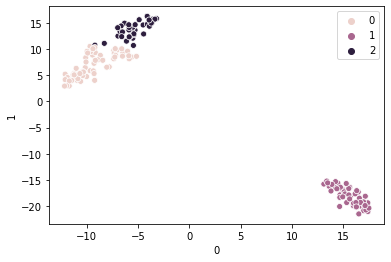

In [56]:
# Clusters
scatterplot(tsne_results[0], tsne_results[1], hue=labels)

# Metrics

In [71]:
clusters = np.arange(0, 20) + 2
rand_score = []
silhouette_score = []

In [72]:
for i in clusters:
    kmeans_model = KMeans(n_clusters=i).fit(X)
    labels = kmeans_model.labels_
    
    rand_score.append(metrics.adjusted_rand_score(y, labels))
    silhouette_score.append(metrics.silhouette_score(X, labels, metric='euclidean'))

<AxesSubplot:>

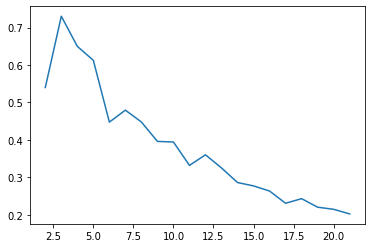

In [76]:
#Rand score
lineplot(x=clusters, y=rand_score)

<AxesSubplot:>

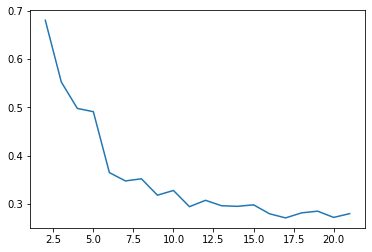

In [77]:
#Silhouette score
lineplot(x=clusters, y=silhouette_score)